## Using Pre-Trained Models
In this exercise we will show how to load pre-trained models such as VGG16 and ResNet.  This is a fairly simple exercise designed to get you familiar with models like VGG and Resnet and the output they give.

You will load in the VGG and ResNet models.  You will then use your laptop camera to take a picture.  Then you will run your picture through these models to see the results.

You can also take pictures yourself and manually upload them.  Or find images on the internet and download them.  

Look at the results for at least 5 different pictures and consider:

- Did the models get the "right" answer?  Was the "right" answer on the list?
- How confident was the prediction (did the top choice have a probability close to 1?)
- How did the model handle pictures with multiple objects in them? (e.g. the rocking chair picture)
- What were some of the "wrong" answers on the list?  Can you understand why the image classifier may have thought those other answers were correct?


In [ ]:
# install opencv if you haven't
# conda install -c https://conda.binstar.org/menpo opencv3
# pip install pillow

In [17]:
from PIL import Image
from tensorflow.keras.preprocessing import image
import numpy as np
import pandas as pd
from tensorflow import keras

import cv2
from imageio import imread
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

%matplotlib inline

In [18]:
def get_image(camera):
    retval, im = camera.read()
    return im

In [19]:
def save_webcam_image(img_path):

    try:
        camera_port = 0
        ramp_frames = 10
    
        camera = cv2.VideoCapture(camera_port)

        for i in range(ramp_frames):
            retval, im_camera = camera.read()

        retval, im_camera = camera.read()

        im = cv2.resize(im_camera, (224, 224)).astype(np.float32)
        cv2.imwrite(img_path, im)
        del (camera)
        return True
    except ValueError as e:
        print("Image Capture Failed")
    return False

In [20]:
img_path = "webcam_test_img.png"

if save_webcam_image(img_path) is False:
    # Webcam not active, use the coffee mug Image
    img_path = "coffee_mug.jpg"
    print("Using the Test Coffee Mug Image: {}".format(img_path))

### Image from webcam

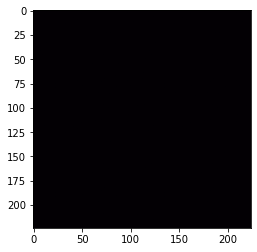

In [21]:
plt.imshow(mpimg.imread(img_path))

In [22]:
base_img_path = './images/'
img_paths = ['dumbel.png', 'lamp.png', 'tissue.png', 'dumbelandtissue.png']

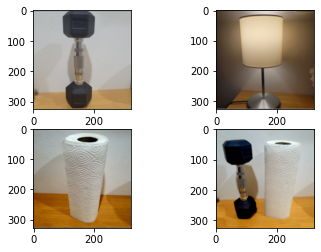

In [23]:
# Image set
for i in range(len(img_paths)):
    plt.subplot(2, 2, i + 1)
    plt.imshow(mpimg.imread(base_img_path + img_paths[i]))

## VGG16 - Pretrained Model

In [26]:
from tensorflow.keras.applications import vgg16

vgg16_model = vgg16.VGG16(weights='imagenet')
vgg16_model.summary()

553467904/553467096 [==============================] - 24s 0us/step
Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
___________________________________________________________

In [27]:
# Utility Function to Load Image, Preprocess input and Targets
def predict_image(model, img_path, preprocess_input_fn, decode_predictions_fn, target_size=(224, 224)):

    img = image.load_img(img_path, target_size=target_size)
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x = preprocess_input_fn(x)
    
    preds = model.predict(x)
    predictions_df = pd.DataFrame(decode_predictions_fn(preds, top=10)[0])
    predictions_df.columns = ["Predicted Class", "Name", "Probability"]
    return predictions_df

40960/35363 [==================================] - 0s 1us/step


,Predicted Class,Name,Probability
0,n03729826,matchstick,0.075584
1,n01930112,nematode,0.046673
2,n03666591,lighter,0.030374
3,n03196217,digital_clock,0.029024
4,n04286575,spotlight,0.023767
5,n02948072,candle,0.012974
6,n03590841,jack-o'-lantern,0.012953
7,n03637318,lampshade,0.009333
8,n04376876,syringe,0.008097
9,n04328186,stopwatch,0.008096


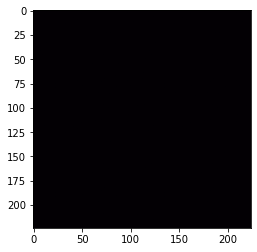

In [28]:
#img_path="rocking_chair.png"  ## Uncomment this and put the path to your file here if desired
# Predict Results
plt.imshow(mpimg.imread(img_path))
predict_image(vgg16_model, img_path, vgg16.preprocess_input, vgg16.decode_predictions)

,Predicted Class,Name,Probability
0,n04380533,table_lamp,0.712395
1,n03637318,lampshade,0.282433
2,n02948072,candle,0.002297
3,n04286575,spotlight,0.001604
4,n03887697,paper_towel,0.000168
5,n03793489,mouse,0.000124
6,n04553703,washbasin,0.000057
7,n04404412,television,0.000052
8,n15075141,toilet_tissue,0.000045
9,n03201208,dining_table,0.000044


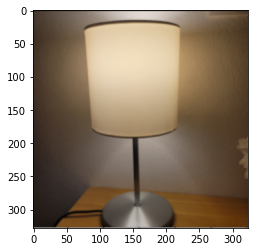

In [29]:
plt.imshow(mpimg.imread(base_img_path + img_paths[1]))
predict_image(vgg16_model, base_img_path + img_paths[1], vgg16.preprocess_input, vgg16.decode_predictions)

,Predicted Class,Name,Probability
0,n03255030,dumbbell,0.399885
1,n04485082,tripod,0.112664
2,n03759954,microphone,0.093420
3,n03602883,joystick,0.088391
4,n04023962,punching_bag,0.021682
5,n04041544,radio,0.020309
6,n03995372,power_drill,0.016971
7,n02790996,barbell,0.015265
8,n03691459,loudspeaker,0.014636
9,n03297495,espresso_maker,0.013669


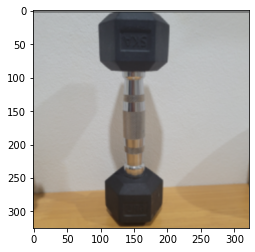

In [30]:
plt.imshow(mpimg.imread(base_img_path + img_paths[0]))
predict_image(vgg16_model, base_img_path + img_paths[0], vgg16.preprocess_input, vgg16.decode_predictions)

,Predicted Class,Name,Probability
0,n15075141,toilet_tissue,5.400921e-01
1,n03887697,paper_towel,4.598641e-01
2,n02948072,candle,1.383826e-05
3,n04522168,vase,5.779073e-06
4,n03637318,lampshade,3.374838e-06
5,n04380533,table_lamp,2.869196e-06
6,n03063599,coffee_mug,1.413856e-06
7,n03843555,oil_filter,1.154777e-06
8,n07930864,cup,9.517614e-07
9,n02786058,Band_Aid,8.242828e-07


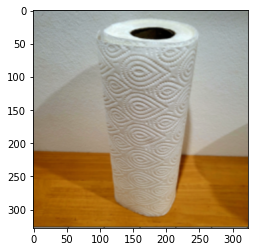

In [31]:
plt.imshow(mpimg.imread(base_img_path + img_paths[2]))
predict_image(vgg16_model, base_img_path + img_paths[2], vgg16.preprocess_input, vgg16.decode_predictions)

,Predicted Class,Name,Probability
0,n03887697,paper_towel,0.979265
1,n15075141,toilet_tissue,0.014935
2,n04380533,table_lamp,0.000831
3,n04023962,punching_bag,0.000651
4,n03691459,loudspeaker,0.000492
5,n02948072,candle,0.000487
6,n03970156,plunger,0.000379
7,n03759954,microphone,0.000334
8,n03637318,lampshade,0.000238
9,n04591713,wine_bottle,0.000173


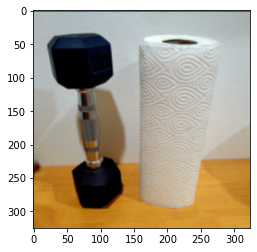

In [32]:
plt.imshow(mpimg.imread(base_img_path + img_paths[3]))
predict_image(vgg16_model, base_img_path + img_paths[3], vgg16.preprocess_input, vgg16.decode_predictions)

## Resnet50 - Pretrained Model

In [25]:
# Define a Resnet model and print the model summary (follow the same procedure as in VGGNet)

# It will download the weights that might take a while
# Also, the summary will be quite long, since Resnet50 is a much larger network than VGG16
from tensorflow.keras.applications import resnet

resnet50_model = resnet.ResNet50(weights='imagenet')
resnet50_model.summary()

102973440/102967424 [==============================] - 6s 0us/step
Model: "resnet50"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 112, 112, 64) 256         conv1_conv[0][0]                 
________________________

,Predicted Class,Name,Probability
0,n06359193,web_site,0.071267
1,n01930112,nematode,0.051879
2,n03196217,digital_clock,0.035701
3,n03729826,matchstick,0.033155
4,n04404412,television,0.028525
5,n04286575,spotlight,0.025838
6,n04418357,theater_curtain,0.025212
7,n04201297,shoji,0.022969
8,n03782006,monitor,0.021856
9,n02667093,abaya,0.018555


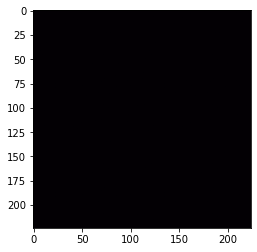

In [33]:
# Predict Results
plt.imshow(mpimg.imread(img_path))
predict_image(resnet50_model, img_path, resnet.preprocess_input, resnet.decode_predictions)

,Predicted Class,Name,Probability
0,n04380533,table_lamp,0.929457
1,n03637318,lampshade,0.066177
2,n04286575,spotlight,0.003825
3,n03179701,desk,0.000101
4,n04404412,television,0.000064
5,n03691459,loudspeaker,0.000049
6,n03271574,electric_fan,0.000039
7,n04023962,punching_bag,0.000032
8,n03782006,monitor,0.000029
9,n03337140,file,0.000021


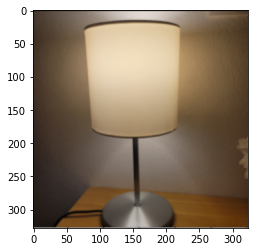

In [34]:
plt.imshow(mpimg.imread(base_img_path + img_paths[1]))
predict_image(resnet50_model, base_img_path + img_paths[1], resnet.preprocess_input, resnet.decode_predictions)

,Predicted Class,Name,Probability
0,n03255030,dumbbell,0.837803
1,n02790996,barbell,0.117435
2,n03759954,microphone,0.016482
3,n04023962,punching_bag,0.005889
4,n02841315,binoculars,0.003843
5,n03691459,loudspeaker,0.003233
6,n04485082,tripod,0.002135
7,n04009552,projector,0.001975
8,n04286575,spotlight,0.001742
9,n03995372,power_drill,0.001224


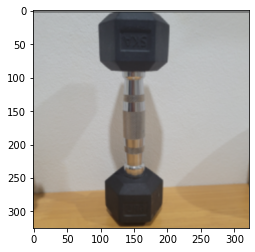

In [35]:
plt.imshow(mpimg.imread(base_img_path + img_paths[0]))
predict_image(resnet50_model, base_img_path + img_paths[0], resnet.preprocess_input, resnet.decode_predictions)

,Predicted Class,Name,Probability
0,n03887697,paper_towel,0.944483
1,n15075141,toilet_tissue,0.054753
2,n04522168,vase,0.000699
3,n03062245,cocktail_shaker,0.000026
4,n04456115,torch,0.000011
5,n03041632,cleaver,0.000008
6,n03840681,ocarina,0.000004
7,n03991062,pot,0.000003
8,n04380533,table_lamp,0.000002
9,n02948072,candle,0.000002


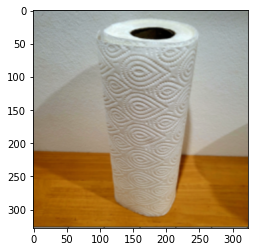

In [36]:
plt.imshow(mpimg.imread(base_img_path + img_paths[2]))
predict_image(resnet50_model, base_img_path + img_paths[2], resnet.preprocess_input, resnet.decode_predictions)

,Predicted Class,Name,Probability
0,n03887697,paper_towel,9.998901e-01
1,n15075141,toilet_tissue,1.098562e-04
2,n03843555,oil_filter,3.437425e-08
3,n03062245,cocktail_shaker,9.209379e-09
4,n04456115,torch,8.921407e-09
5,n03255030,dumbbell,5.856205e-09
6,n03691459,loudspeaker,3.153888e-09
7,n04522168,vase,2.970867e-09
8,n02948072,candle,2.811543e-09
9,n04254120,soap_dispenser,2.537886e-09


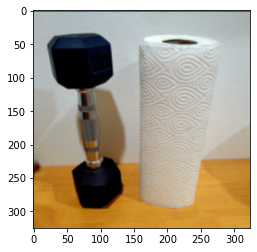

In [37]:
plt.imshow(mpimg.imread(base_img_path + img_paths[3]))
predict_image(resnet50_model, base_img_path + img_paths[3], resnet.preprocess_input, resnet.decode_predictions)

# โมเดล VGG16 และ RESNET จำแนกประเภทถูกต้องหรือไม่
ทั้งสองโมเดลสามารถจำแนกประเภทของได้อย่างถูกต้อง แต่มีข้อแตกต่างที่โมเดล RESNET จะจำแนกประเภทที่ได้อันดับ 1 โดยจะมีความน่าจะเป็นค่อนข้างสูง อยู่ในช่วง 0.8-0.9
ในขณะที่ VGG16 ประเภทที่ได้อันดับ 1 จะมีความน่าจะเป็นตั้งแต่ 0.39 ไปจนถึง 0.9 แสดงให้เห็นว่า โมเดล RESNET จะมีการทำนายผลที่เฉพาะเจาะจงกว่า ในขณะที่ VGG16 จะไให้คำตอบที่ไม่เจาะจง

# ค่าความมันใจที่ได้จากโมเดล
จะพบว่าโมเดลทั้งสอง จะให้ประเภทอันดับ 1 มีค่าใกล้กับ 1 มากที่สุด ซึ่งในรูปที่โมเดลเหล่านี้มีข้อมูล และรูปตัวอย่างของเราชัดเจน จะพบว่าความมั่นใจในการจัดกลุ่มจะสูงมาก
แต่ในรูปที่เป็นรูปที่มนุษย์เองก็มองยากว่าเป็นอะไร ค่าความมั่นใจของโมเดลจะน้อยมากๆ และทั้งสองโมเดลก็จัดกลุ่มรูปนั้นแตกต่างกัน

# โมเดลทั้ง 2 สามารถจำแนกประเภทของหลายสิ่งในภาพได้หรือไม่ อย่างไร

ทั้ง Resnet50 และ VGG16 ไม่สามารถจำแนกของหลายสิ่งในภาพได้ 

Softmaxคือ ฟังก์ชันที่รับ Input แล้ว Normalize ออกมาเป็นความน่าจะเป็น Probability ที่ผลรวมเท่ากับ 1 แต่เหมาะกับการใช้งานที่คาดหวัง Output ที่ถูกต้องอันเดียวเท่านั้น 

feature map คือ บันทึกลักษณะต่าง ๆ ของรูปภาพเหล่านั้น ในแต่ละ Layer ต่อยอดขึ้นไปเรื่อยๆ ตั้งแต่ จุด เส้นแนวตั้ง เส้นแนวนอน เส้นแนวทแยง มุม เส้นโค้ง วงกลม พื้นผิว ลวดลาย ไปจนถึง วัตถุที่เรากำหนด

แต่เนื่องจาก softmax ใช้งานที่คาดหวัง Output ที่ถูกต้องอันเดียวเท่านั้น model จึงไม่ทราบว่าจะต้องให้ความสำคัญกับวัตถุตำแหน่งไหนเป็นอันดับแรก feature map จึงมีลักษณะบางส่วนเป็นวัตถุแรกและบางส่วนเป็นวัตถุสอง ทำให้ model ไม่สามารถจำแนกของทั้งสองสิ่งได้อย่างแม่นยำ


## Feature map ของ paper towel โดยใช้ VGG16

Model: "model_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
Total params: 1,792
Trainable params: 1,792
Non-trainable params: 0
_________________________________________________________________


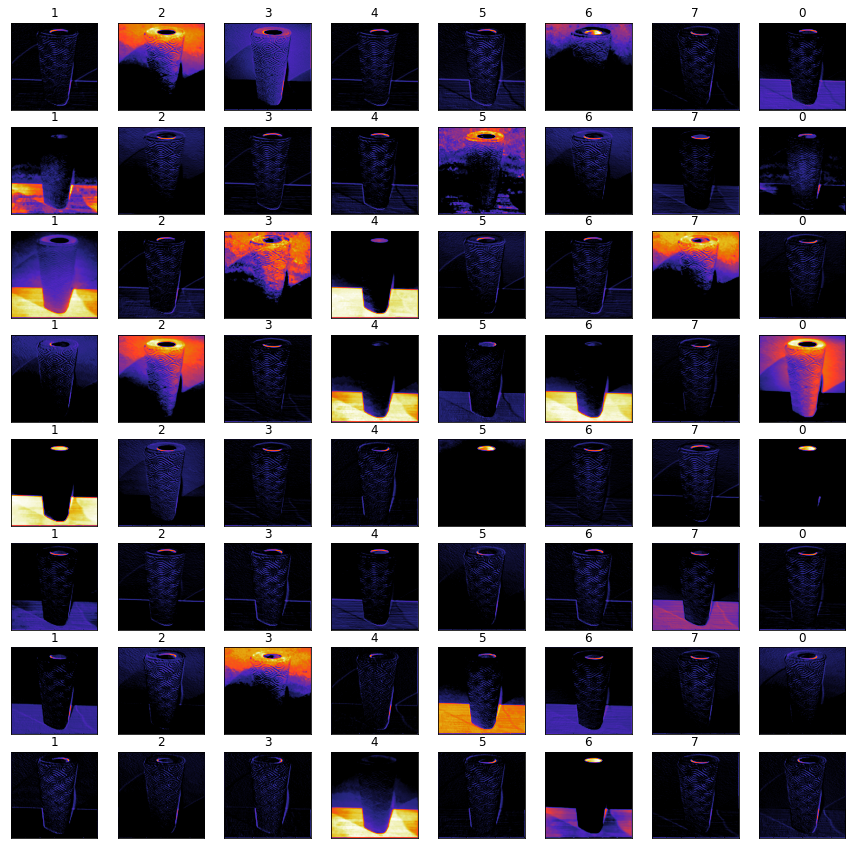

In [46]:
model = keras.Model(inputs=[vgg16_model.input], outputs=vgg16_model.layers[1].output)
model.summary()
img_path =base_img_path + img_paths[2]
# get feature map for first hidden layer
target_size=(224,224)
img = image.load_img(img_path, target_size=target_size)
img = image.img_to_array(img)
img = np.expand_dims(img, axis=0)
img = vgg16.preprocess_input(img)
feature_maps = model.predict(img)
feature_maps.shape
plt.figure(figsize=(15,15))
# plot the 64 maps in an 8x8 squares
square = 8
ix = 1
for i in range(square):
    for j in range(square):
        # specify subplot and turn of axis
        plt.title(j)
        ax = plt.subplot(square, square, ix)
        ax.set_xticks([])
        ax.set_yticks([])
        # plot filter channel in grayscale
        plt.imshow(feature_maps[0, :, :, ix-1], cmap='CMRmap') # 'RdBu','PRGn' 'CMRmap' 'gnuplot2'
        ix += 1
        
# show the figure
plt.show()

จากภาพการ visualize feature map ด้านบนจะเห็นได้ว่าใน feature map มีโค้งมน ส่วนที่เป็นเส้นตรง วงกลม และอื่นๆของกระดาษทิชชู่

## Feature map ของ dumbbell และ paper towel ในภาพเดียวกันโดยใช้ VGG16

Model: "model_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
Total params: 1,792
Trainable params: 1,792
Non-trainable params: 0
_________________________________________________________________


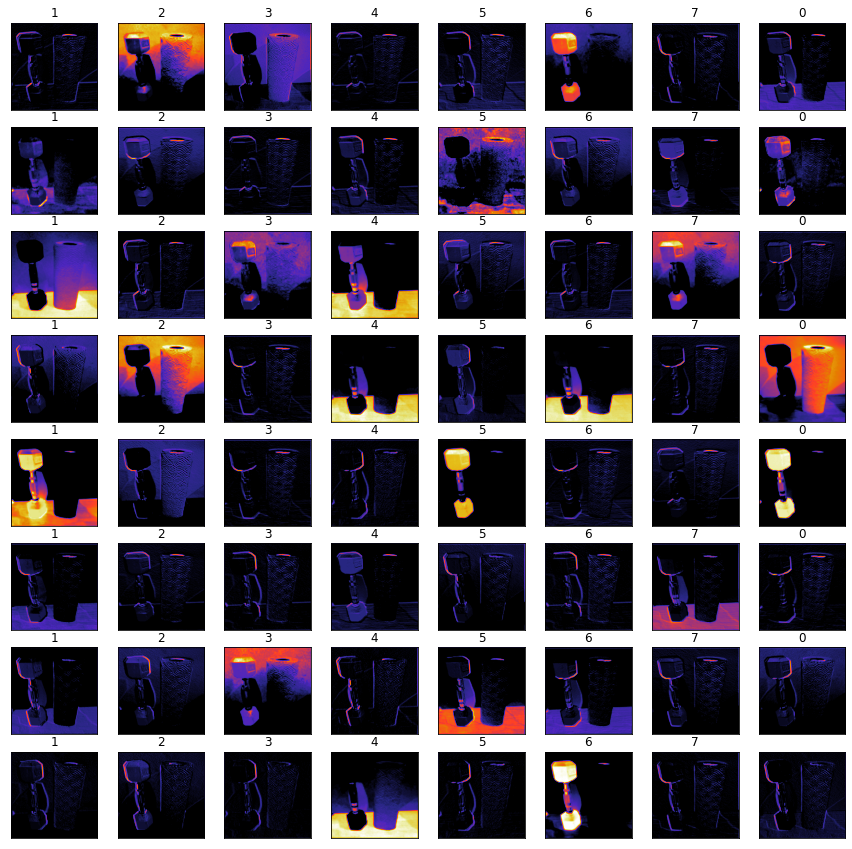

In [53]:

model = keras.Model(inputs=[vgg16_model.input], outputs=vgg16_model.layers[1].output)
model.summary()
img_path = base_img_path + img_paths[3]
# get feature map for first hidden layer
target_size=(224,224)
img = image.load_img(img_path, target_size=target_size)
img = image.img_to_array(img)
img = np.expand_dims(img, axis=0)
img = vgg16.preprocess_input(img)
feature_maps = model.predict(img)
feature_maps.shape
plt.figure(figsize=(15,15))
# plot the 64 maps in an 8x8 squares
square = 8
ix = 1
for i in range(square):
    for j in range(square):
        # specify subplot and turn of axis
        plt.title(j)
        ax = plt.subplot(square, square, ix)
        ax.set_xticks([])
        ax.set_yticks([])
        # plot filter channel in grayscale
        plt.imshow(feature_maps[0, :, :, ix-1], cmap='CMRmap') # 'RdBu','PRGn' 'CMRmap' 'gnuplot2'
        ix += 1
        
# show the figure
plt.show()

จากภาพการ visualize feature map ด้านบนจะเห็นได้ว่าใน feature map มีทั้งลักษณะโค้งมน ส่วนที่เป็นเส้นตรง วงกลม และอื่นๆของกระดาษทิชชู่และดัมเบล

## นิสิตคิดว่าประเภทที่โมเดลจำแนกผิดเกิดขึ้นได้อย่างไร เพราะอะไร
อาจเป็นเพราะ สิ่งที่ทำนายได้ไม่อยู่ใน class ของ ImageNet ทำให้ไม่มี weights ของสิ่งที่เราทำนาย model จึงทำการหาสิ่งของที่มีลักษณะใกล้เคียงที่สุดจาก class ของ ImageNet และทำให้เกิดการจำแนกผิด 


หรือ อาจเป็นเพราะลักษณะภาพที่ใช้ train แตกต่างจากสิ่งที่เราต้องการทำนาย 
ซึ่งอาจเกิดขึ้นกับ วัตถุที่มีรูปทรงหลากหลายแบบ เช่น แก้ว โคมไฟ 
หรือในทำนองเดียวกันเนื่องจาก Dataset ของ ImageNet ถูกสร้างขึ้นในช่วงปี 2012-2017 ทำให้ลักษณะของวัตถุที่เคย train ไว้อาจไม่ตรงกับลักษณะวัตถุในปัจจุบันทำให้เกิดการจำแนกผิด 